<b>In this practical exam you are required to do the following:</b><b>
1. Implement the Adam (Batch Version) algorithm to train a multivariable linear regression model.
2. Update your implementation to work for mini-batch.
</b>

### Please fulfil the following requirements:
<br>
<b>
    
    1. Each implementation must be in a sepearate function. i.e. two separate functions.
    2. Check each function on the data in the attached file.
    3. You must obtain r2-score > 0.9 using each functiion.
    4. You must plot the following curves.
        - Loss vs. iterations.
        - Loss vs. each parameter (i.e. loss vs theta 0, loss vs. theta 1 .... etc.).
    5. Choose hyper parameters to obtain the required accuracy.
    6. The implementation must be vectoried and calculations must be performed as matrix vector multiplications.
    7. Apply the stop conditions (gradient < 0.001 and cost convergence check).                                            
</b>
    
<b><i>Note: You are allowed to use the code you developed during practical sessions. However, it should be your own code.</i></b>

## Best of Luck...

# imports

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import r2_score
from sklearn import utils

In [3]:
df=pd.read_csv("MultipleLR.csv")
df

,73,80,75,152
0,93,88,93,185
1,89,91,90,180
2,96,98,100,196
3,73,66,70,142
4,53,46,55,101
5,69,74,77,149
6,47,56,60,115
7,87,79,90,175
8,79,70,88,164
9,69,70,73,141


In [5]:
X=df.values[:,: -1]
y=df.values[:,-1]
y=y.reshape(-1,1)
print(X.shape)
print(y.shape)

(24, 3)
(24, 1)


In [7]:
X0 = np.ones((len(df.values),1))
X = np.hstack((X0,X))
X

array([[  1.,  93.,  88.,  93.],
       [  1.,  89.,  91.,  90.],
       [  1.,  96.,  98., 100.],
       [  1.,  73.,  66.,  70.],
       [  1.,  53.,  46.,  55.],
       [  1.,  69.,  74.,  77.],
       [  1.,  47.,  56.,  60.],
       [  1.,  87.,  79.,  90.],
       [  1.,  79.,  70.,  88.],
       [  1.,  69.,  70.,  73.],
       [  1.,  70.,  65.,  74.],
       [  1.,  93.,  95.,  91.],
       [  1.,  79.,  80.,  73.],
       [  1.,  70.,  73.,  78.],
       [  1.,  93.,  89.,  96.],
       [  1.,  78.,  75.,  68.],
       [  1.,  81.,  90.,  93.],
       [  1.,  88.,  92.,  86.],
       [  1.,  78.,  83.,  77.],
       [  1.,  82.,  86.,  90.],
       [  1.,  86.,  82.,  89.],
       [  1.,  78.,  83.,  85.],
       [  1.,  76.,  83.,  71.],
       [  1.,  96.,  93.,  95.]])

# 1. Implement the Adam (Batch Version) algorithm to train a multivariable linear regression model.

In [47]:
def adam_BGD(X,y,learning_rate = 0.01, epochs = 100,beta1 = 0.8, beta2 = 0.9, epsilon = 0.001):
    costs , thetas = [] , []
    m = X.shape[0]
    #1.assum thetas ,v's, mt's
    theta = np.zeros((X.shape[1],1))  #shape(3,1)
    vt = np.zeros((X.shape[1],1))     #shape(3,1)
    mt = np.zeros((X.shape[1],1))
    for i in range(epochs):
        #calculate hypothesis
        y_hat = np.dot(X,theta) #shape(24,1)  (24,3).(3.1)
        #calculate error
        error = y_hat - y          #shape(50,1)
        #calculate cost function
        cost = (1/(2*m))*np.dot(error.T,error) #shape(1,1) as (1,24).(24,1)
        costs.append(cost.item())
        #calculate gradients
        gradient = np.dot(X.T,error)/y.shape[0] #shape(1,1) as (1,24).(24,1)
        #calculate momentums (momentum cares for gradient direction)
        mt = beta1*mt + (1-beta1)* gradient
        #update v's (doesn't care for gradient direction)
        vt = beta2*vt + (1-beta2) * (gradient**2)
        #hypothesis for v's and momentum
        mt_hat = mt / (1-beta1)
        vt_hat = vt / (1-beta2)
        #update thetas
        theta = theta - mt_hat*(learning_rate/np.sqrt(vt_hat + epsilon))
        thetas.append(theta)  
        if(i>0 and np.abs(costs[i]-costs[i-1])<0.01):
            print("stopped at iteration {}".format(i))
            break
    return costs , np.array(thetas)

In [48]:
costs , thetas= adam_BGD(X,y)

stopped at iteration 61


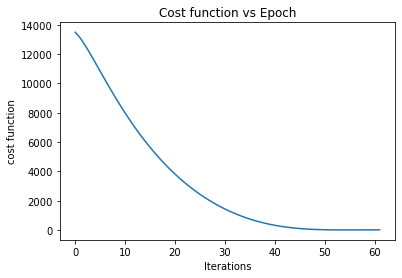

In [49]:
plt.plot(costs)
plt.xlabel("Iterations")
plt.ylabel("cost function")
plt.title("Cost function vs Epoch");

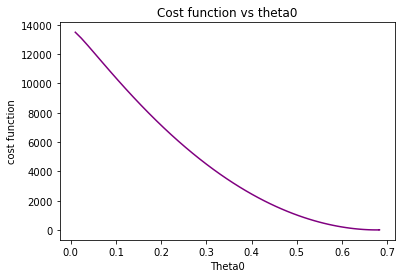

In [50]:
plt.plot(thetas[:,0],costs, color = 'purple')
plt.xlabel("Theta0");
plt.ylabel("cost function");
plt.title("Cost function vs theta0");

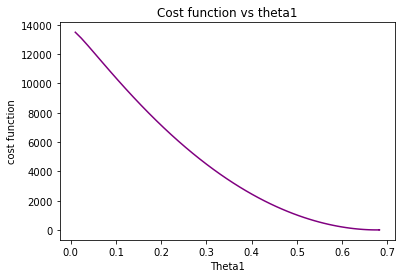

In [53]:
plt.plot(thetas[:,1],costs, color = 'purple')
plt.xlabel("Theta1");
plt.ylabel("cost function");
plt.title("Cost function vs theta1");

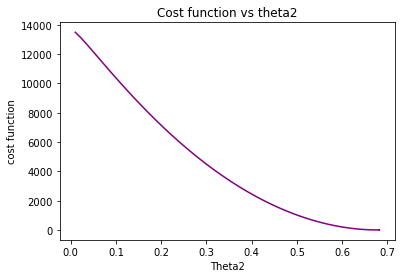

In [54]:
plt.plot(thetas[:,2],costs, color = 'purple')
plt.xlabel("Theta2");
plt.ylabel("cost function");
plt.title("Cost function vs theta2");

In [55]:
r2_score(y,np.dot(X,thetas[-1]))

0.9673496194749065

# 2. Update your implementation to work for mini-batch.

In [17]:
def adam_MBGD(X,y,batch_size = 5, learning_rate = 0.01,epoch = 1000, beta1 = 0.8, beta2 = 0.9, epsilon = 0.001):
    costs,thetas = [],[]
    
    #1.assume thetas , vts, mts
    theta = np.zeros((X.shape[1],1)) #shape(3,1)
    vt = np.zeros((X.shape[1],1))    #shape(3,1)
    mt = np.zeros((X.shape[1],1))
    #batches
    _x = [X[i:i+batch_size] for i in range(0,len(X),batch_size)]
    _y = [y[i:i+batch_size] for i in range(0,len(y),batch_size)]
    for i in range(epoch):
        for j in range(len(_x)):
            #calculate hypothesis
            y_hat = np.dot(_x[j],theta)
            #calculate error
            error = y_hat - _y[j]
            #calculate cost
            cost = (1/(2*batch_size))*np.dot(error.T,error)  #shape(1,1)  (1,5).(5,1)
            costs.append(cost.item())
            #calculate gradients
            gradient = np.dot(_x[j].T,error)/batch_size  #shape(1,1)  (1,5).(5,1)
            #calculate momentums (momentum cares for gradient direction)
            mt = beta1*mt + (1-beta1)* gradient
            #update v's (doesn't care for gradient direction)
            vt = beta2*vt + (1-beta2) * (gradient**2)
            #hypothesis for v's and momentum
            mt_hat = mt / (1-beta1)
            vt_hat = vt / (1-beta2)
            #update thetas
            theta = theta - mt_hat*(learning_rate/np.sqrt(vt_hat + epsilon))
            thetas.append(theta)
        #stop condition
        if(i>0 and np.abs(costs[i* len(X)//batch_size-1]-costs[-1])<0.01):
            print("stopped at iteration {}".format(i))
            break
    return costs , np.array(thetas)

In [18]:
adam_MB_costs,adam_MB_theta = adam_MBGD(X,y)

stopped at iteration 21


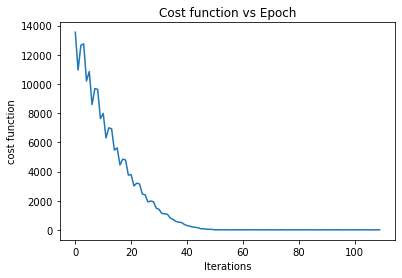

In [19]:
plt.plot(adam_MB_costs)
plt.xlabel("Iterations")
plt.ylabel("cost function")
plt.title("Cost function vs Epoch");

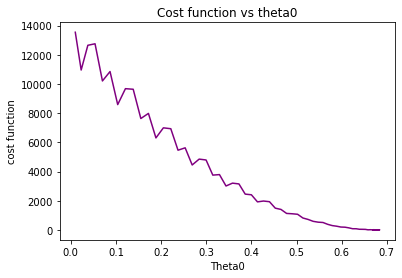

In [20]:
plt.plot(adam_MB_theta[:,0],adam_MB_costs, color = 'purple')
plt.xlabel("Theta0");
plt.ylabel("cost function");
plt.title("Cost function vs theta0");

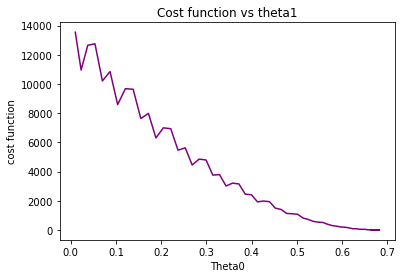

In [24]:
plt.plot(adam_MB_theta[:,1],adam_MB_costs, color = 'purple')
plt.xlabel("Theta0");
plt.ylabel("cost function");
plt.title("Cost function vs theta1");

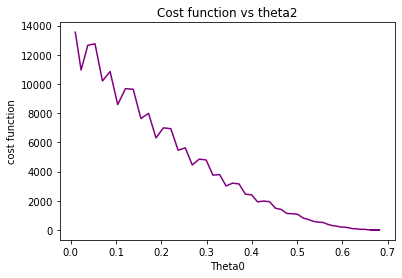

In [25]:
plt.plot(adam_MB_theta[:,2],adam_MB_costs, color = 'purple')
plt.xlabel("Theta0");
plt.ylabel("cost function");
plt.title("Cost function vs theta2");

In [12]:
r2_score(y,np.dot(X,adam_MB_theta[-1]))

0.9791278520258467